In [1]:
# Import Statements

# Data Handling
import numpy as np
import pandas as pd

# Machine Learning
from sklearn import preprocessing, model_selection, svm
from sklearn import datasets

# Plotting
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
# Load Example Data from SKLearn
flowers = datasets.load_iris()
print(flowers.feature_names)
df = pd.DataFrame(np.concatenate(
                    (flowers.data, np.transpose([flowers.target])), 
                axis = 1))
df.columns = flowers.feature_names + ['species']

df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


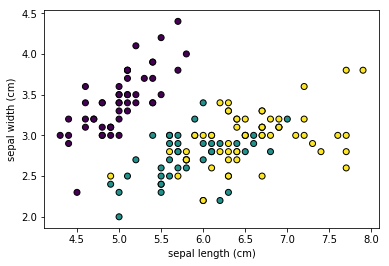

In [3]:
x_coord = df.columns[0]
y_coord = df.columns[1]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

In [4]:
def make_meshgrid3D(x, y, z, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    z_min, z_max = z.min() - 1, z.max() + 1
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h),
                         np.arange(z_min, z_max, h))
    return xx, yy, zz


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

0.8333333333333334


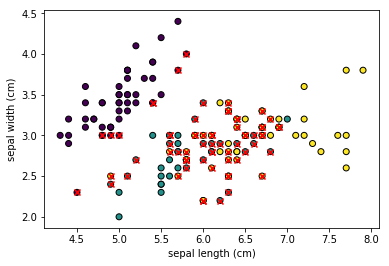

In [7]:
# Separate Features (X) from Labels (y)
X = flowers.data
y = flowers.target

percent_split = 0.2
X_train, X_test, y_train, y_test = model_selection.\
                    train_test_split(X[:, :2], y, test_size = percent_split)
    
# Now we choose the SVM Classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Now we compare the score
accuracy = clf.score(X_test, y_test)
print(accuracy)


# Now we want to visualize the support vectors
x_index = 0
y_index = 1

x_coord = df.columns[x_index]
y_coord = df.columns[y_index]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.scatter(clf.support_vectors_[:, x_index], \
            clf.support_vectors_[:, y_index], \
            c = 'r', marker = 'x')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

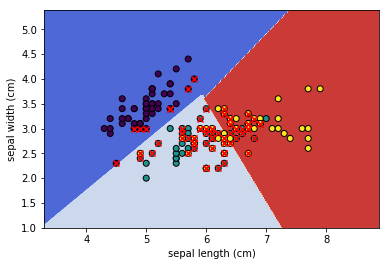

In [8]:
# X0, X1, X2, X3 = X[:, 0], X[:, 1], X[:, 2], X[:, 3]
# xx, yy, zz, aa = make_meshgrid4D(X0, X1, X2, X3)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Now we want to see where new data would be predicted to fall
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)

# Now we want to visualize the support vectors
x_index = 0
y_index = 1

x_coord = df.columns[x_index]
y_coord = df.columns[y_index]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.scatter(clf.support_vectors_[:, x_index], \
            clf.support_vectors_[:, y_index], \
            c = 'r', marker = 'x')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

0.9666666666666667


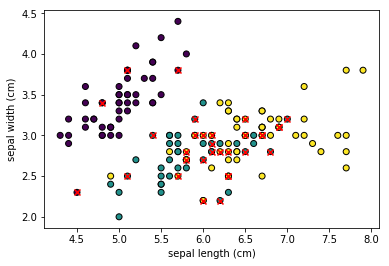

In [10]:
# Separate Features (X) from Labels (y)
X = flowers.data
y = flowers.target

percent_split = 0.2
X_train, X_test, y_train, y_test = model_selection.\
                    train_test_split(X[:, :3], y, test_size = percent_split)
    
# Now we choose the SVM Classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Now we compare the score
accuracy = clf.score(X_test, y_test)
print(accuracy)


# Now we want to visualize the support vectors
x_index = 0
y_index = 1

x_coord = df.columns[x_index]
y_coord = df.columns[y_index]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.scatter(clf.support_vectors_[:, x_index], \
            clf.support_vectors_[:, y_index], \
            c = 'r', marker = 'x')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

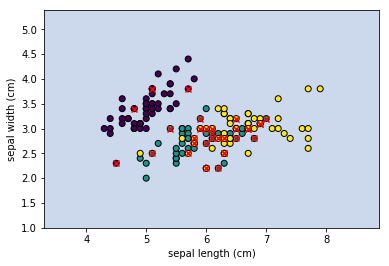

In [13]:
X0, X1, X2 = X[:, 0], X[:, 1], X[:, 2]
xx, yy, zz = make_meshgrid3D(X0, X1, X2)


# Now we want to see where new data would be predicted to fall
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx[:,:,0], yy[:,:,0], Z[:,:,0], cmap=plt.cm.coolwarm)

# Now we want to visualize the support vectors
x_index = 0
y_index = 1

x_coord = df.columns[x_index]
y_coord = df.columns[y_index]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.scatter(clf.support_vectors_[:, x_index], \
            clf.support_vectors_[:, y_index], \
            c = 'r', marker = 'x')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

In [ ]:
for i in range(10):
    print(np.array_equal(Z[:,:,5], Z[:,:,i]))